Shape of gmn array:  (960, 50001)
Times (in years) of output [ 4200.   4200.2  4200.4 ... 14199.6 14199.8 14200. ]


<Figure size 432x288 with 0 Axes>

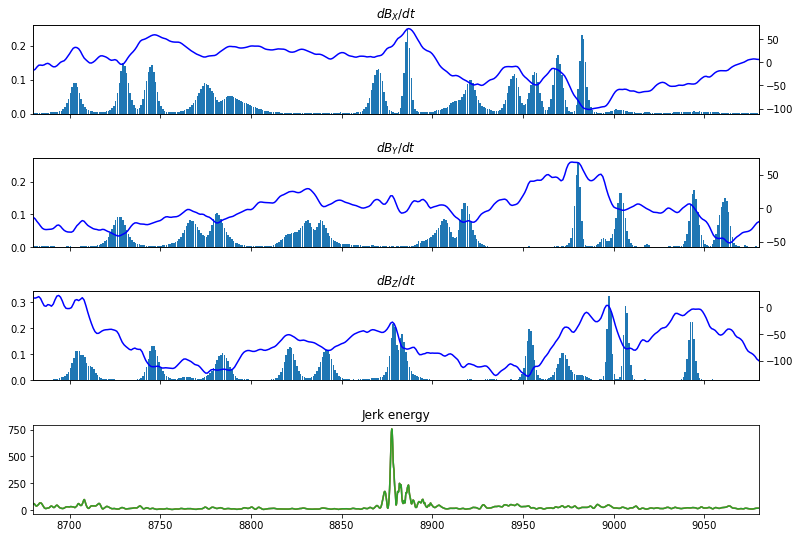

In [4]:
# Plot jerk at a specific location

import numpy as np
import pickle
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

jerk_number = 8 
# jerk times as defined in catalogue
jerk_times = [4600,5750,2920, 1915, 6490,7300,7620,7840,8880,9673,10590,12620,13411,13546]
# sample every year
time_yearly = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200+1)
t0 = jerk_times[jerk_number]
f_size = 16  # fontsize for figure

filename = "Jerk"+str(jerk_number+1)+"_5x5_20M.results"
with open(filename, "rb") as fp:   # Unpickling
     results = pickle.load(fp)
        
        
import chaosmagpy as cp
# import the dataset
import h5py
filepath = 'Gauss_Bsurf.mat'
arrays = {}
f = h5py.File(filepath,'r')
for k, v in f.items():
    arrays[k] = np.array(v)

coeffs = arrays['gnm'][:,:].T
time = arrays['timers'].flatten()
print( 'Shape of gmn array: ', arrays['gnm'].shape )
print ('Times (in years) of output', time )
radius = 6371.2
TIMES = time_yearly
NUM_DATA = len(TIMES)
TIMES_MIN = TIMES.min()
TIMES_MAX = TIMES.max()
CP_NBINS = 1*np.int(TIMES_MAX - TIMES_MIN) #one per year

plt.figure()
f, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(13,9), sharex=True)

for j in range(len(results)):
    theta = results[j][0]
    phi = results[j][1]
    component = results[j][2]
    CP = results[j][3]
    if(theta==40 and phi == 0):
        #theta=90
        #phi=80
        Br, Btheta, Bphi = cp.model_utils.synth_values(coeffs, radius, theta, phi,nmax=13)
        Br_yearly,Btheta_yearly, Bphi_yearly = np.interp(time_yearly, time, Br ), np.interp(time_yearly, time, Btheta ), np.interp(time_yearly, time, Bphi )
        Bx_dot, By_dot, Bz_dot = -np.gradient(Btheta_yearly,time_yearly), np.gradient(Bphi_yearly,time_yearly), -np.gradient(Br_yearly,time_yearly)
        left_edges = np.linspace(TIMES_MIN, TIMES_MAX, CP_NBINS,endpoint=False)
        if component == 0:
            ax1.bar(left_edges, CP, align='edge', width = 0.85*(left_edges[1] - left_edges[0]))
            ax1.set_xlim(time_yearly.min(), time_yearly.max() )
            ax5 = ax1.twinx()
            ax5.plot(TIMES,Bx_dot,'b')
            ax1.set_title(r'$d{B_X}/dt$')

        if component == 1:
            ax2.bar(left_edges, CP, align='edge', width = 0.85*(left_edges[1] - left_edges[0]))
            ax2.set_xlim(time_yearly.min(), time_yearly.max() )
            ax5 = ax2.twinx()
            ax5.plot(TIMES,By_dot,'b')
            ax2.set_title(r'$d{B_Y}/dt$')

        if component == 2:
            ax3.bar(left_edges, CP, align='edge', width = 0.85*(left_edges[1] - left_edges[0]))
            ax3.set_xlim(time_yearly.min(), time_yearly.max() )
            ax5 = ax3.twinx()
            ax5.plot(TIMES,Bz_dot,'b')
            ax3.set_title(r'$d{B_Z}/dt$')

        time_EJ, EJ = np.loadtxt('Jerk_energy.dat',unpack=True)
        ax4.plot(time_EJ, EJ )

        ax4.set_xlim(time_yearly.min(), time_yearly.max()  )
        ax4.set_title('Jerk energy')


        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

        outfname = 'Jerk'+str(jerk_number+1)+'_ts_theta'+str(theta)+'_phi'+str(phi)
        plt.savefig(outfname+'.pdf')
        plt.savefig(outfname+'.png')
